In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
def converter_precos(preco):

    return float(preco.replace(",", "").replace(' ', '').split('$')[1])
    #return float(preco.replace(' ', '').split('$')[1])

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_customers = pd.read_csv('./Customers.csv', encoding='unicode_escape')
df_exchange_rates = pd.read_csv('./Exchange_Rates.csv', encoding='unicode_escape')
df_products = pd.read_csv('./Products.csv', encoding='unicode_escape')
df_sales = pd.read_csv('./Sales.csv', encoding='unicode_escape')
df_stores = pd.read_csv('./Stores.csv', encoding='unicode_escape')

In [5]:
df_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [6]:
df_customers.shape

(15266, 10)

In [7]:
df_exchange_rates.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [8]:
df_exchange_rates.shape

(11215, 3)

In [9]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [10]:
df_products.shape

(2517, 10)

In [11]:
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [12]:
df_sales.shape

(62884, 9)

In [13]:
df_stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [14]:
df_stores.shape

(67, 5)

# Manipulações

In [15]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [16]:
df_products['Category'].unique()

array(['Audio', 'TV and Video', 'Computers', 'Cameras and camcorders',
       'Cell phones', 'Music, Movies and Audio Books', 'Games and Toys',
       'Home Appliances'], dtype=object)

In [17]:
df_products['Category'].value_counts()

Category
Home Appliances                  661
Computers                        606
Cameras and camcorders           372
Cell phones                      285
TV and Video                     222
Games and Toys                   166
Audio                            115
Music, Movies and Audio Books     90
Name: count, dtype: int64

In [18]:
#df_products.iloc[300:333]

In [19]:
df_products[df_products['Color'] == 'Black']

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
5,6,Contoso 2G MP3 Player E200 Black,Contoso,Black,$11.00,$21.57,101,MP4&MP3,1,Audio
8,9,Contoso 4G MP3 Player E400 Black,Contoso,Black,$30.58,$59.99,101,MP4&MP3,1,Audio
12,13,Contoso 4GB Flash MP3 Player E401 Black,Contoso,Black,$35.72,$77.68,101,MP4&MP3,1,Audio
19,20,Contoso 8GB MP3 Player new model M820 Black,Contoso,Black,$61.62,$134.00,101,MP4&MP3,1,Audio
24,25,Contoso 16GB Mp5 Player M1600 Black,Contoso,Black,$91.93,$199.90,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2497,2498,Contoso Phone Tough Skin Case E140 Black,Contoso,Black,$12.09,$23.72,505,Cell phones Accessories,5,Cell phones
2501,2502,Contoso Touch Stylus Pen E150 Black,Contoso,Black,$5.09,$9.99,505,Cell phones Accessories,5,Cell phones
2508,2509,Contoso Original K1m Li-Ion Standard Battery E...,Contoso,Black,$2.07,$4.06,505,Cell phones Accessories,5,Cell phones
2511,2512,Contoso Bluetooth Active Headphones L15 Black,Contoso,Black,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones


In [20]:
df_products.loc[8, 'Unit Price USD']

'$59.99 '

In [21]:
df_products.loc[8, 'Unit Price USD'].replace(' ', '')

'$59.99'

In [22]:
df_products.loc[8, 'Unit Price USD'].split('$')[1].replace(' ', '')

'59.99'

In [23]:
float(df_products.loc[8, 'Unit Price USD'].split('$')[1].replace(' ', ''))

59.99

# Corrigir preços

In [24]:
df_products['Unit Price USD'] = df_products['Unit Price USD'].apply(lambda x : converter_precos(x))

In [25]:
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].apply(lambda x : converter_precos(x))

In [26]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [27]:
type(df_products.loc[8, 'Unit Price USD'])

numpy.float64

In [28]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [29]:
df_products.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [30]:
df_sales.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [31]:
df_sales.shape

(62884, 9)

In [32]:
df_sales.isna().sum()['Delivery Date']/df_sales.shape[0]*100

79.064626932129

In [33]:
df_sales[pd.isna(df_sales['Delivery Date'])]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD
...,...,...,...,...,...,...,...,...,...
62867,2243025,1,2/20/2021,NaN,1909290,49,1128,2,USD
62868,2243025,2,2/20/2021,NaN,1909290,49,2511,2,USD
62869,2243026,1,2/20/2021,NaN,1737466,49,58,6,USD
62872,2243028,1,2/20/2021,NaN,1728060,66,1584,3,USD


**Abordagem de remoção de linha**

In [34]:
#df_sales.dropna(inplace=True)

In [35]:
#df_sales[pd.isna(df_sales['Delivery Date'])]

In [36]:
#df_sales.shape

**Abordagem de remoção de coluna**

In [37]:
df_sales.drop('Delivery Date', axis=1, inplace=True)

In [38]:
df_sales.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,266019,0,373,1,CAD


**e = & ou = |**

In [39]:
df_products[(df_products['Brand'] == 'Contoso') &
            (df_products['SubcategoryKey'] == 101) &
            (df_products['Unit Cost USD'] < 10)]

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio


In [40]:
df_products[['Unit Cost USD', 'Unit Price USD']].mean()

Unit Cost USD     147.655562
Unit Price USD    356.830131
dtype: float64

In [41]:
df_products[['Unit Cost USD', 'Unit Price USD']].std()

Unit Cost USD     184.373683
Unit Price USD    494.054962
dtype: float64

In [42]:
df_products[['Unit Cost USD', 'Unit Price USD']].max()

Unit Cost USD     1060.22
Unit Price USD    3199.99
dtype: float64

In [43]:
df_products[['Unit Cost USD', 'Unit Price USD']].min()

Unit Cost USD     0.48
Unit Price USD    0.95
dtype: float64

In [44]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [45]:
df_products.drop(['ProductKey', 'SubcategoryKey', 'CategoryKey'], axis=1).describe()

,Unit Cost USD,Unit Price USD
count,2517.000000,2517.000000
mean,147.655562,356.830131
std,184.373683,494.054962
min,0.480000,0.950000
25%,32.250000,69.000000
50%,86.670000,199.990000
75%,183.950000,410.000000
max,1060.220000,3199.990000


In [46]:
df_products[['Brand', 'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'Category']].head()

,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category
0,Contoso,6.62,12.99,MP4&MP3,Audio
1,Contoso,6.62,12.99,MP4&MP3,Audio
2,Contoso,7.40,14.52,MP4&MP3,Audio
3,Contoso,11.00,21.57,MP4&MP3,Audio
4,Contoso,11.00,21.57,MP4&MP3,Audio


In [47]:
df_grouped = df_products[['Brand', 'Unit Cost USD', 'Unit Price USD', 'Subcategory', 'Category']] \
        .groupby(by=['Brand', 'Subcategory', 'Category']) \
        .agg({'Unit Cost USD':'mean', 'Unit Price USD':'sum'})

# Junção de tabelas

In [48]:
df_sales.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,266019,0,373,1,CAD


In [49]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [50]:
#df_sales.merge(df_products, right_on='ProductKey', left_on='Product_Key_1').head()
df_merge = df_sales.merge(df_products, on='ProductKey')

In [51]:
df_merge.sort_values(by='CustomerKey', ascending=True, inplace=True, ignore_index=True)

In [53]:
df_merge.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1776007,1,11/11/2019,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio
1,1830002,2,1/4/2020,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers
2,1830002,3,1/4/2020,325,0,1698,3,AUD,SV Hand Games for students E40 Red,Southridge Video,Red,3.56,6.99,701,Boxed Games,7,Games and Toys
3,1830002,1,1/4/2020,325,0,715,1,AUD,Proseware Duplex Scanner M200 White,Proseware,White,68.52,149.00,306,"Printers, Scanners & Fax",3,Computers
4,1781006,2,11/16/2019,325,6,75,3,AUD,NT Bluetooth Active Headphones E202 White,Northwind Traders,White,17.45,37.95,106,Bluetooth Headphones,1,Audio


In [55]:
df_merge['Custo Total'] = df_merge[['Quantity', 'Unit Cost USD']] \
    .apply(lambda x : x['Quantity']*x['Unit Cost USD'], axis=1)

In [57]:
df_merge['Valor Total'] = df_merge[['Quantity', 'Unit Price USD']] \
    .apply(lambda x : x['Quantity']*x['Unit Price USD'], axis=1)

In [58]:
df_merge.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Custo Total,Valor Total
0,1776007,1,11/11/2019,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio,196.14,592.00
1,1830002,2,1/4/2020,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers,59.32,129.00
2,1830002,3,1/4/2020,325,0,1698,3,AUD,SV Hand Games for students E40 Red,Southridge Video,Red,3.56,6.99,701,Boxed Games,7,Games and Toys,10.68,20.97
3,1830002,1,1/4/2020,325,0,715,1,AUD,Proseware Duplex Scanner M200 White,Proseware,White,68.52,149.00,306,"Printers, Scanners & Fax",3,Computers,68.52,149.00
4,1781006,2,11/16/2019,325,6,75,3,AUD,NT Bluetooth Active Headphones E202 White,Northwind Traders,White,17.45,37.95,106,Bluetooth Headphones,1,Audio,52.35,113.85


In [72]:
#df_merge.loc[4, 'Order Date']

In [73]:
#datetime.datetime.strptime(df_merge.loc[4, 'Order Date'], '%m/%d/%Y')

# Conversão de data (string para datetime)

https://docs.python.org/pt-br/3.7/library/datetime.html

In [70]:
df_merge['Order Date'] = df_merge['Order Date'] \
    .apply(lambda x : datetime.datetime.strptime(x, '%m/%d/%Y'))

In [71]:
df_merge.head()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Custo Total,Valor Total
0,1776007,1,2019-11-11,301,0,53,2,AUD,WWI 4GB Video Recording Pen X200 Black,Wide World Importers,Black,98.07,296.00,104,Recording Pen,1,Audio,196.14,592.00
1,1830002,2,2020-01-04,325,0,731,1,AUD,Proseware Ink Jet Wireless All-In-One Printer ...,Proseware,Green,59.32,129.00,306,"Printers, Scanners & Fax",3,Computers,59.32,129.00
2,1830002,3,2020-01-04,325,0,1698,3,AUD,SV Hand Games for students E40 Red,Southridge Video,Red,3.56,6.99,701,Boxed Games,7,Games and Toys,10.68,20.97
3,1830002,1,2020-01-04,325,0,715,1,AUD,Proseware Duplex Scanner M200 White,Proseware,White,68.52,149.00,306,"Printers, Scanners & Fax",3,Computers,68.52,149.00
4,1781006,2,2019-11-16,325,6,75,3,AUD,NT Bluetooth Active Headphones E202 White,Northwind Traders,White,17.45,37.95,106,Bluetooth Headphones,1,Audio,52.35,113.85


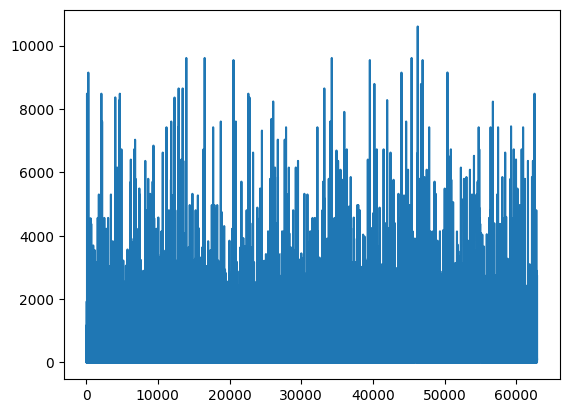

In [75]:
plt.plot(df_merge['Custo Total'])

In [76]:
df_plot = df_merge.copy()

In [78]:
df_plot.sort_values(by=['Order Number', 'Order Date'], \
                    inplace=True, ascending=True, ignore_index=True)

In [80]:
df_plot.set_index('Order Date', inplace=True)

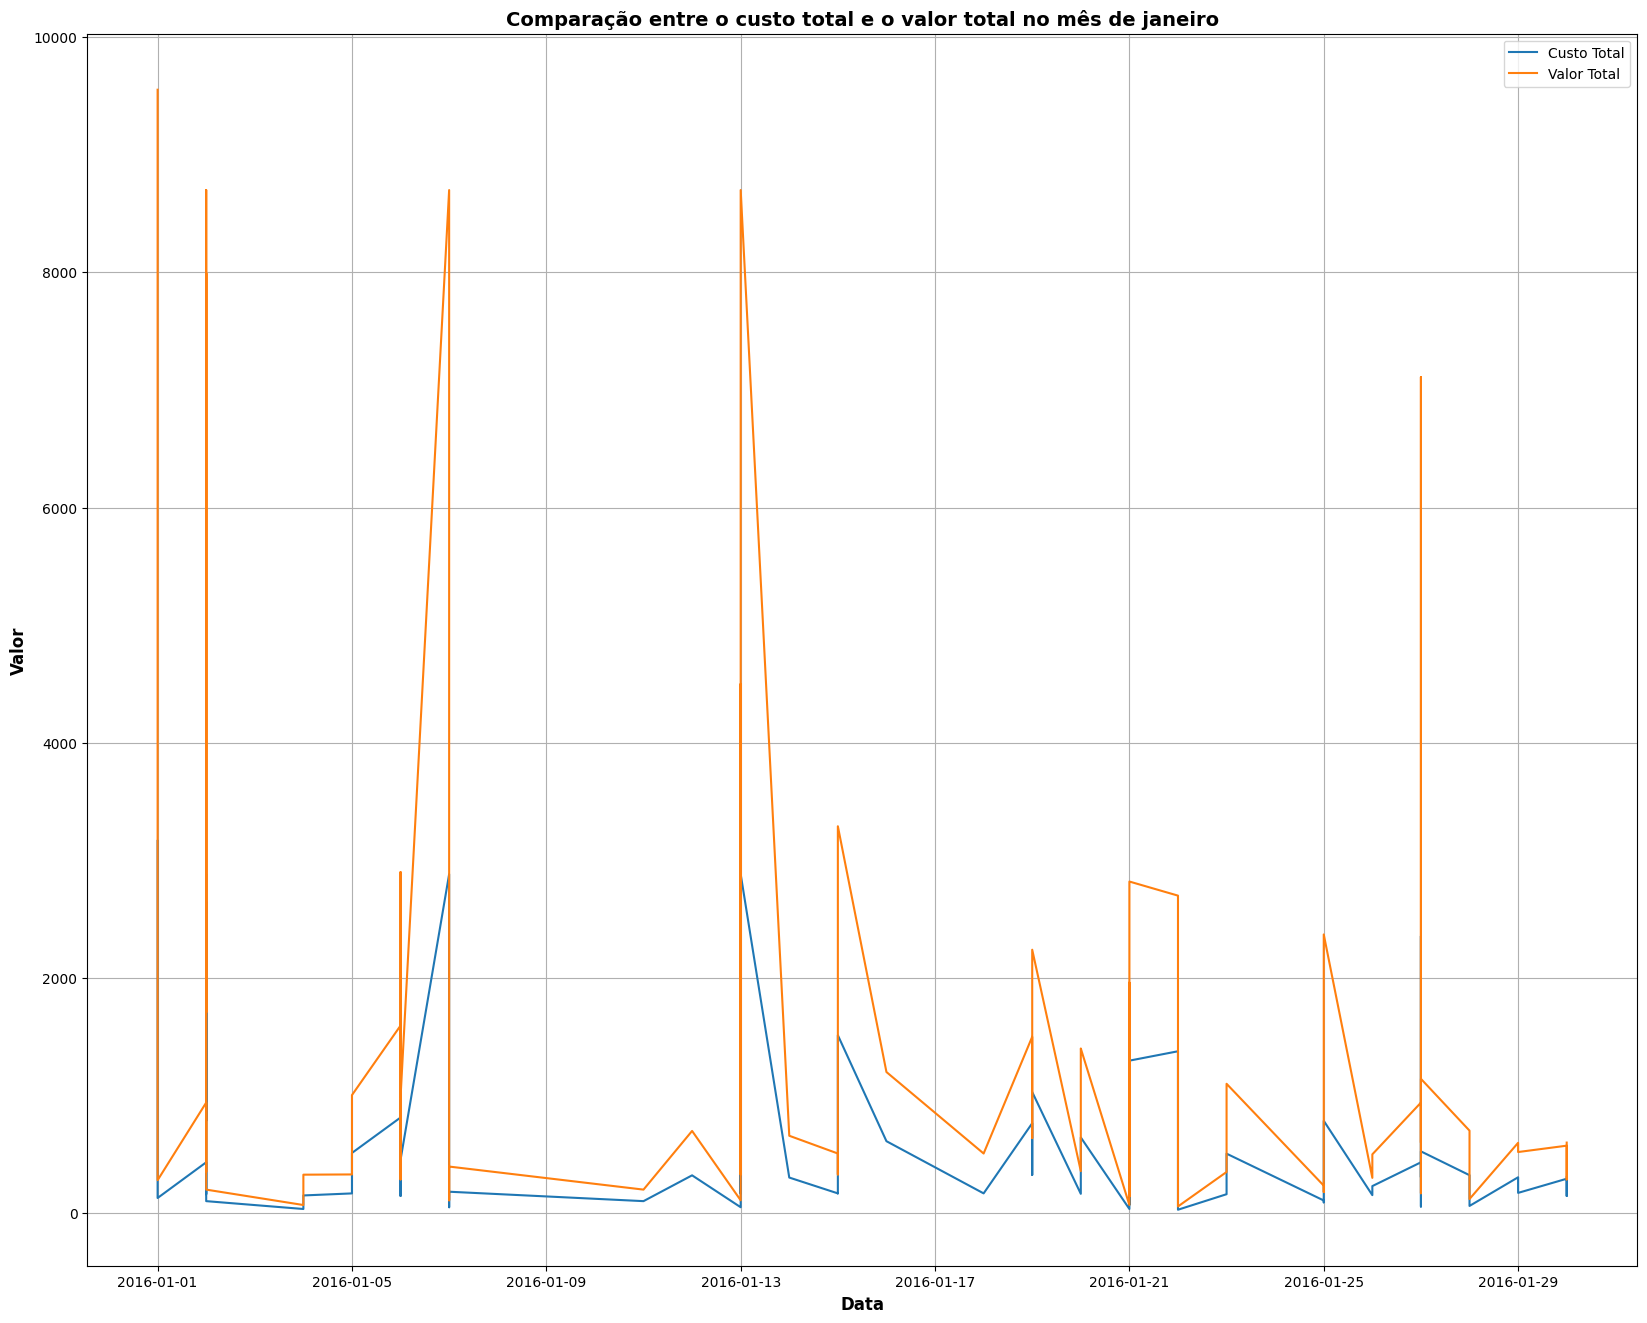

In [95]:
plt.figure(figsize=(20, 16))
plt.plot(df_plot[df_plot['Category'] == 'TV and Video'] \
         .loc['2016-01-01':'2016-01-31']['Custo Total'])
plt.plot(df_plot[df_plot['Category'] == 'TV and Video'] \
         .loc['2016-01-01':'2016-01-31']['Valor Total'])
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Valor', fontsize=12, fontweight='bold')
plt.title('Comparação entre o custo total e o valor total no mês de janeiro'\
          , fontsize=14, fontweight='bold')
plt.legend(['Custo Total', 'Valor Total'])
plt.grid()
plt.savefig('./comparacao_vendas_custo.png')

# Visualizações com Seaborn

In [96]:
df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Contoso'),
  Text(1, 0, 'Wide World Importers'),
  Text(2, 0, 'Northwind Traders'),
  Text(3, 0, 'Adventure Works'),
  Text(4, 0, 'Southridge Video'),
  Text(5, 0, 'Litware'),
  Text(6, 0, 'Fabrikam'),
  Text(7, 0, 'Proseware'),
  Text(8, 0, 'A. Datum'),
  Text(9, 0, 'The Phone Company'),
  Text(10, 0, 'Tailspin Toys')])

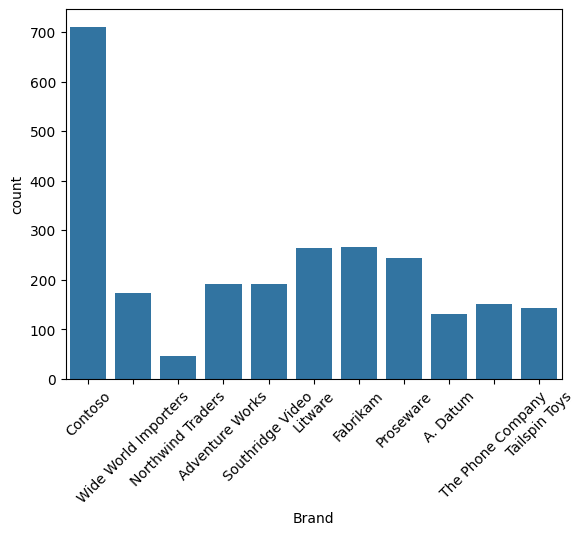

In [99]:
sns.countplot(data=df_products, x='Brand')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Audio'),
  Text(1, 0, 'TV and Video'),
  Text(2, 0, 'Computers'),
  Text(3, 0, 'Cameras and camcorders'),
  Text(4, 0, 'Cell phones'),
  Text(5, 0, 'Music, Movies and Audio Books'),
  Text(6, 0, 'Games and Toys'),
  Text(7, 0, 'Home Appliances')])

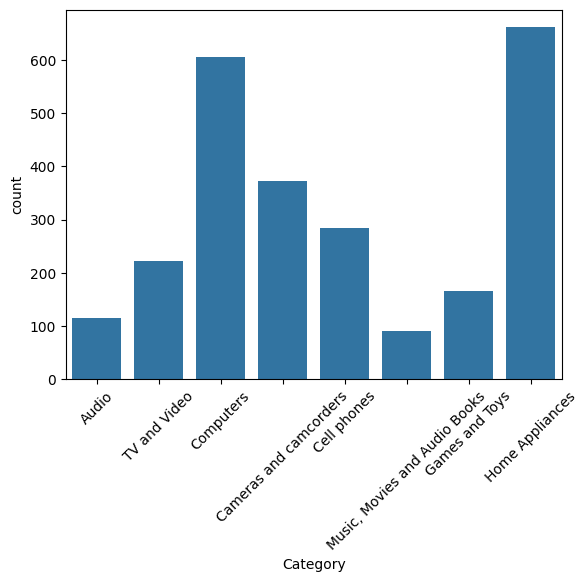

In [100]:
sns.countplot(data=df_products, x='Category')
plt.xticks(rotation=45)

<Axes: ylabel='Unit Cost USD'>

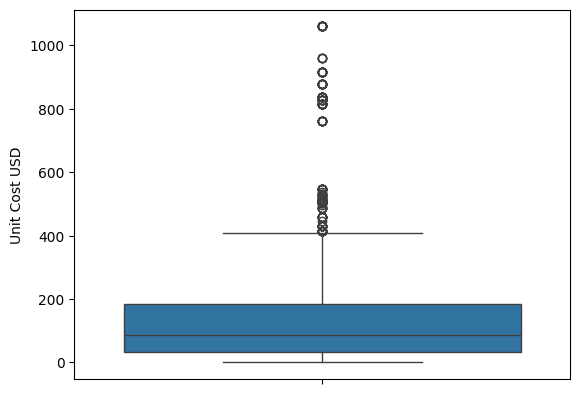

In [101]:
sns.boxplot(data=df_products, y='Unit Cost USD')

<Axes: >

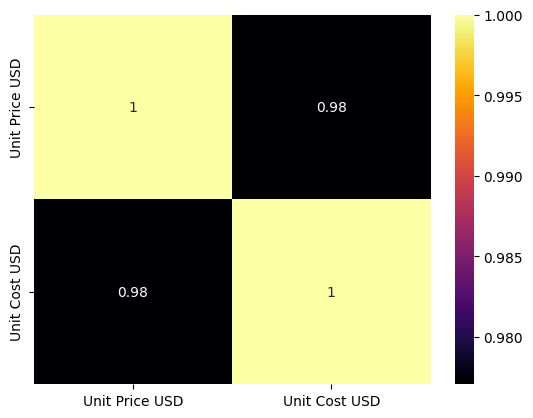

In [106]:
sns.heatmap(df_products[['Unit Price USD', 'Unit Cost USD']] \
            .corr(), cmap='inferno', annot=True)